In [209]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from PIL import Image
import tensorflow as tf
import os
import glob
import pandas as pd
import random
import warnings
warnings.filterwarnings('ignore')

In [210]:
def isValidImage(path):
    try:
        with Image.open(path) as img:
            return True
    except:
        return False

In [211]:
label = []
images = []

#importing images

for class_name in os.listdir("PetImages"):
    for sub_class in os.listdir("PetImages/"+class_name):
        if(isValidImage("PetImages/"+class_name+"/"+sub_class)):
            if(class_name == "Cat"):
                label.append(0)
            else:
                label.append(1)
            images.append("PetImages/"+class_name+"/"+sub_class)
print(len(images))

24998


In [212]:
df = pd.DataFrame()
df["images"] = images
df["label"] = label
df = df.sample(frac=1).reset_index(drop=True)
df

,images,label
0,PetImages/Cat/6461.jpg,0
1,PetImages/Cat/2461.jpg,0
2,PetImages/Cat/4542.jpg,0
3,PetImages/Cat/3368.jpg,0
4,PetImages/Cat/7558.jpg,0
...,...,...
24993,PetImages/Dog/5179.jpg,1
24994,PetImages/Cat/285.jpg,0
24995,PetImages/Dog/10485.jpg,1
24996,PetImages/Cat/2559.jpg,0


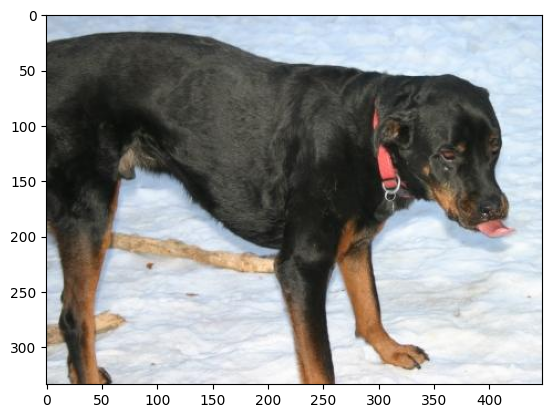

In [213]:
img = Image.open(df["images"][random.randint(0, len(images)-1)])
plt.imshow(img)
plt.show()

In [214]:
df["label"] = df["label"].astype(str)
df

,images,label
0,PetImages/Cat/6461.jpg,0
1,PetImages/Cat/2461.jpg,0
2,PetImages/Cat/4542.jpg,0
3,PetImages/Cat/3368.jpg,0
4,PetImages/Cat/7558.jpg,0
...,...,...
24993,PetImages/Dog/5179.jpg,1
24994,PetImages/Cat/285.jpg,0
24995,PetImages/Dog/10485.jpg,1
24996,PetImages/Cat/2559.jpg,0


<Axes: xlabel='count', ylabel='label'>

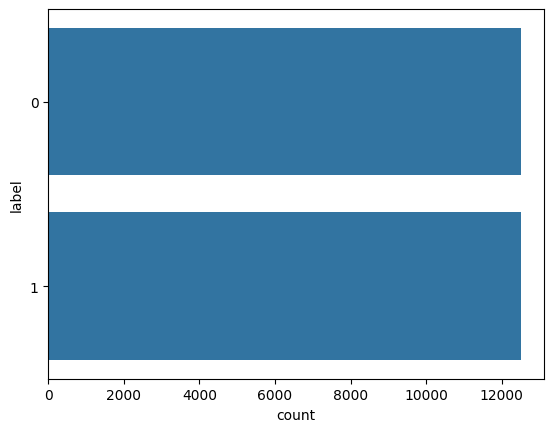

In [215]:
import seaborn as sns
sns.countplot(df['label'])

In [216]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df , test_size=0.25 , random_state=42)

In [217]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)
test_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)

train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col = "images",
    y_col = "label",
    target_size = (128 , 128),
    batch_size = 512,
    class_mode = "binary"
)
test_iterator = test_generator.flow_from_dataframe(
    test,
    x_col = "images",
    y_col = "label",
    target_size = (128 , 128),
    batch_size = 512,
    class_mode = "binary"
)

Found 18748 validated image filenames belonging to 2 classes.
Found 6250 validated image filenames belonging to 2 classes.


In [218]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten , Dense


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

In [219]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,939,329 (49.36 MB)

 Trainable params: 12,939,329 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [220]:
history = model.fit(train_iterator, epochs=10, validation_data=test_iterator)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 249s 6s/step - accuracy: 0.5165 - loss: 0.8500 - val_accuracy: 0.6274 - val_loss: 0.6488
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 189s 5s/step - accuracy: 0.6363 - loss: 0.6419 - val_accuracy: 0.6856 - val_loss: 0.5978
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 186s 5s/step - accuracy: 0.6948 - loss: 0.5827 - val_accuracy: 0.7056 - val_loss: 0.5627
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 188s 5s/step - accuracy: 0.7066 - loss: 0.5652 - val_accuracy: 0.7346 - val_loss: 0.5385
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 187s 5s/step - accuracy: 0.7289 - loss: 0.5363 - val_accuracy: 0.7467 - val_loss: 0.5083
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 286s 7s/step - accuracy: 0.7397 - loss: 0.5203 - val_accuracy: 0.7299 - val_loss: 0.5327
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 342s 8s/step - accuracy: 0.7449 - loss: 0.5151 - val_accuracy: 0.7814 - val_loss: 0.4752
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 300s 8s/step - accuracy: 0.7760 - loss: 0.4731 - val_accuracy: 0.7784 - v

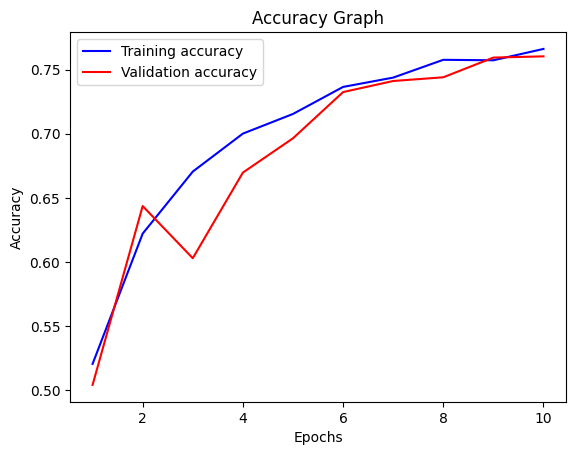

In [221]:
import matplotlib.pyplot as plt

# Assuming 'acc' and 'val_acc' are defined as before
epochs = range(1, len(acc) + 1)  # Generate a list of epoch numbers

plt.plot(epochs, acc, 'b', label="Training accuracy")
plt.plot(epochs, val_acc, 'r', label="Validation accuracy")
plt.title("Accuracy Graph")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [222]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

def load_and_preprocess_image(img_path, target_size=(150, 150)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize to [0,1]
    return img_array


for img_filename in os.listdir("PetImages/Dog"):
    img_path = os.path.join("PetImages/Dog", img_filename)  # Full path to the image
    img_array = load_and_preprocess_image(img_path, target_size=(128, 128))
    
    # Get predictions from the model
    predictions = model.predict(img_array)
    
    # Assuming class_names = ['cat', 'dog']
    predicted_class_index = np.argmax(predictions, axis=-1)[0]
    predicted_class_name = class_names[predicted_class_index]
    predicted_prob = predictions[0][predicted_class_index]
    
    print(f"Image: {img_filename}, Predicted class: {predicted_class_name}, Probability: {predicted_prob}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Image: 0.jpg, Predicted class: cat, Probability: 0.8531256914138794
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image: 1.jpg, Predicted class: cat, Probability: 0.825173020362854
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: 10.jpg, Predicted class: cat, Probability: 0.6968827247619629
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Image: 100.jpg, Predicted class: cat, Probability: 0.8664337396621704
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Image: 1000.jpg, Predicted class: cat, Probability: 0.32371777296066284
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Image: 10000.jpg, Predicted class: cat, Probability: 0.9339662194252014
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Image: 10001.jpg, Predicted class: cat, Probability: 0.9271132946014404
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Image: 10002.jpg, Predicted class: cat, Probability: 0.6442602276802063
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image: 10003.jpg, Predicted class: cat, Probability: 0.47736722230911255
1/1 ━━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [223]:
from tensorflow.keras.metrics import Precision , Recall , BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test_iterator:
    x,y = batch
    yhat = model.predict(x)
    pre.update_state(y , yhat)
    re.update_state(y , yhat)
    acc.update_state(y , yhat)
print("Precision : ", pre.result().numpy())
print("Recall : ", re.result().numpy())
print("Accuracy : ", acc.result().numpy())


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


KeyboardInterrupt: 

In [224]:
print("Precision : ", pre.result().numpy())
print("Recall : ", re.result().numpy())
print("Accuracy : ", acc.result().numpy())

Precision :  0.8136593
Recall :  0.77217615
Accuracy :  0.80010355


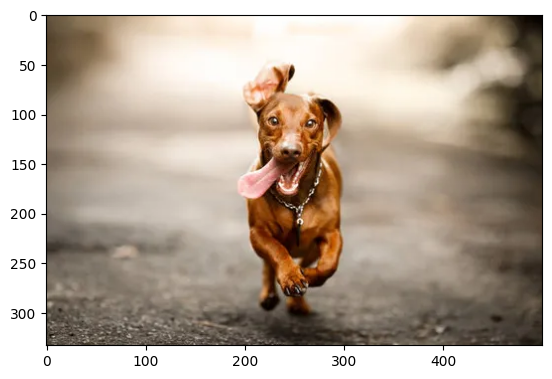

In [270]:
import cv2
img = cv2.imread("D:\\Pyhton\\ML\\Dogs vs Cats\\badger-dog.webp")
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))
plt.show()


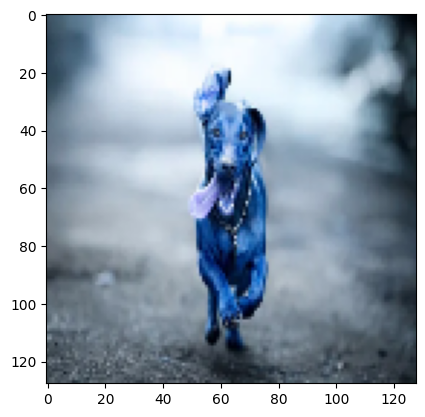

In [271]:
resize = tf.image.resize(img , (128 , 128))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [268]:
np.expand_dims(resize , 0).shape

(1, 128, 128, 3)

In [272]:
yPred = model.predict(np.expand_dims(resize/128 , 0))
print(yPred)
if yPred > 0.5:
    print("The Given picture is a Dog")
else:
    print("The Given picture is a Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.84950817]]
The Given picture is a Dog
